IMPORATATION  DES LIBRAIRIE

In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb


Importation  du  jeu de données

In [2]:
df = pd.read_csv('../Data/flights.csv',low_memory=False) 
save = df.copy()

In [3]:
df.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(5819079, 31)

In [5]:
def data_info(data):
    info_dict = {
    'nombre de valeurs non null': data.count().tolist(), # comptage des valeurs non nulles de chaque colonne   de notre dataframe
    'nombre de valeurs null': data.shape[0] -data.count(),

    'type': data.dtypes.tolist(), # affiche le type de chaque colonne

    '% de valeurs Null' : ( data.shape[0] - data.count()) * 100 /  data.shape[0] ,# Calcul du pourcentage de valeurs nulles

    'valeurs uniques' : data.nunique().tolist(),# affiche le nombre de valeurs uniques de chaque colonne

    }

    return pd.DataFrame(info_dict)

In [6]:
data_info(df)

,nombre de valeurs non null,nombre de valeurs null,type,% de valeurs Null,valeurs uniques
YEAR,5819079,0,int64,0.000000,1
MONTH,5819079,0,int64,0.000000,12
DAY,5819079,0,int64,0.000000,31
DAY_OF_WEEK,5819079,0,int64,0.000000,7
AIRLINE,5819079,0,object,0.000000,14
FLIGHT_NUMBER,5819079,0,int64,0.000000,6952
TAIL_NUMBER,5804358,14721,object,0.252978,4897
ORIGIN_AIRPORT,5819079,0,object,0.000000,628
DESTINATION_AIRPORT,5819079,0,object,0.000000,629
SCHEDULED_DEPARTURE,5819079,0,int64,0.000000,1321


ANALYSE Exploratoire des données 

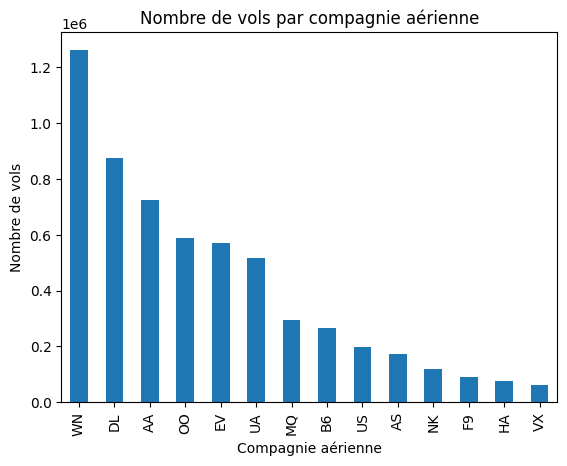

In [7]:
#Nombre de vols par compagnie aérienne
air = df['AIRLINE'].value_counts()
air.plot(kind='bar')
plt.title('Nombre de vols par compagnie aérienne')
plt.xlabel('Compagnie aérienne')
plt.ylabel('Nombre de vols')
plt.show()

In [8]:
df['AIRLINE'].value_counts().to_frame()

,count
AIRLINE,
WN,1261855
DL,875881
AA,725984
OO,588353
EV,571977
UA,515723
MQ,294632
B6,267048
US,198715


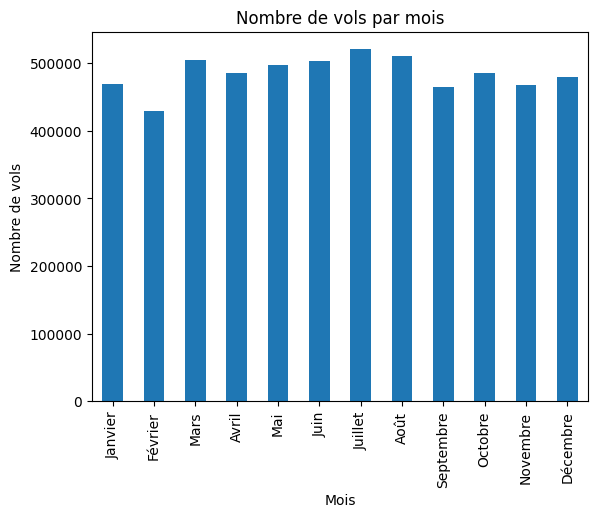

In [9]:
mois = {
    1: 'Janvier',
    2: 'Février',
    3: 'Mars',
    4: 'Avril',
    5: 'Mai',
    6: 'Juin',
    7: 'Juillet',
    8: 'Août',
    9: 'Septembre',
    10: 'Octobre',
    11: 'Novembre',
    12: 'Décembre'
}
vol_m= df.groupby('MONTH').size()
vol_m.index = vol_m.index.map(mois)
vol_m.plot(kind='bar')
plt.title('Nombre de vols par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de vols')
plt.show()

In [10]:
vol_m

MONTH
Janvier      469968
Février      429191
Mars         504312
Avril        485151
Mai          496993
Juin         503897
Juillet      520718
Août         510536
Septembre    464946
Octobre      486165
Novembre     467972
Décembre     479230
dtype: int64

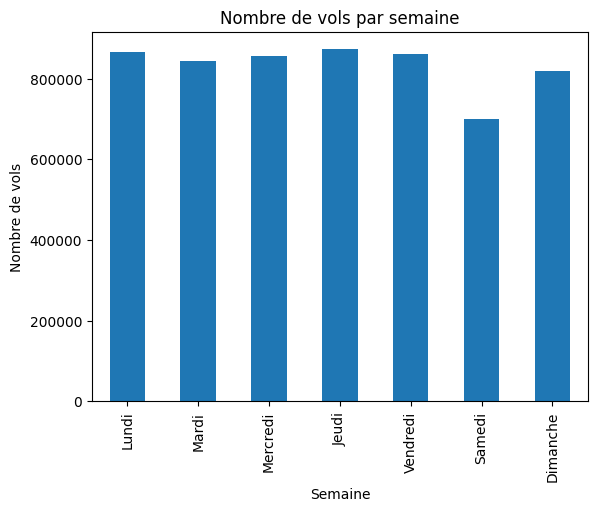

In [11]:
week = {
    1: 'Lundi',
    2: 'Mardi',
    3: 'Mercredi',
    4: 'Jeudi',
    5: 'Vendredi',
    6: 'Samedi',
    7: 'Dimanche'
    
    
}
vol_w = df.groupby('DAY_OF_WEEK').size()
vol_w.index = vol_w.index.map(week)
vol_w.plot(kind='bar')
plt.title('Nombre de vols par semaine')
plt.xlabel('Semaine')
plt.ylabel('Nombre de vols')
plt.show()

In [12]:
vol_w

DAY_OF_WEEK
Lundi       865543
Mardi       844600
Mercredi    855897
Jeudi       872521
Vendredi    862209
Samedi      700545
Dimanche    817764
dtype: int64

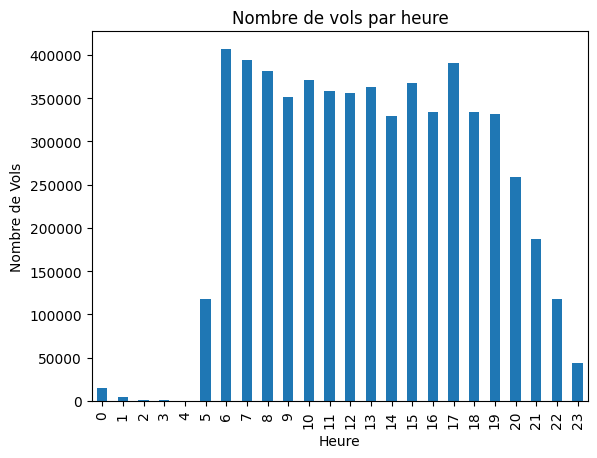

In [13]:
hours = df['SCHEDULED_DEPARTURE'] // 100

# Grouper les vols par heure de départ et compter le nombre de vols par heure
hourly= hours.value_counts().sort_index()

hourly.plot(kind='bar')
plt.title('Nombre de vols par heure')

plt.xlabel('Heure')
plt.ylabel('Nombre de Vols')

plt.show()

In [14]:
diverted_counts = df.groupby(['AIRLINE', 'DIVERTED']).size().unstack(fill_value=0)
cancelled_counts = df.groupby(['AIRLINE', 'CANCELLED']).size().unstack(fill_value=0)

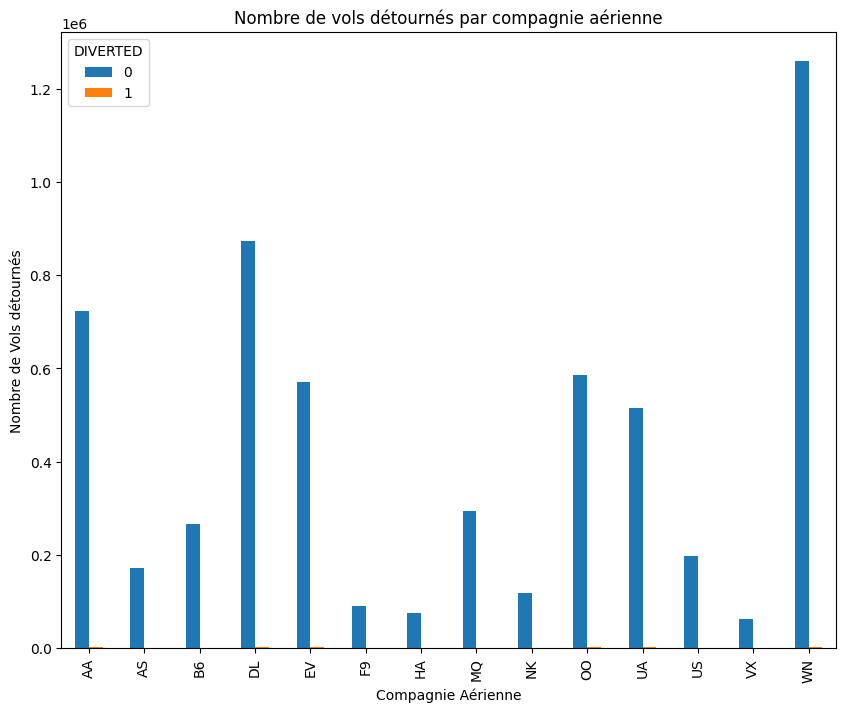

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))  


diverted_counts.plot(kind='bar', ax=ax)
ax.set_title('Nombre de vols détournés par compagnie aérienne')
ax.set_xlabel('Compagnie Aérienne')
ax.set_ylabel('Nombre de Vols détournés')
plt.show()
    




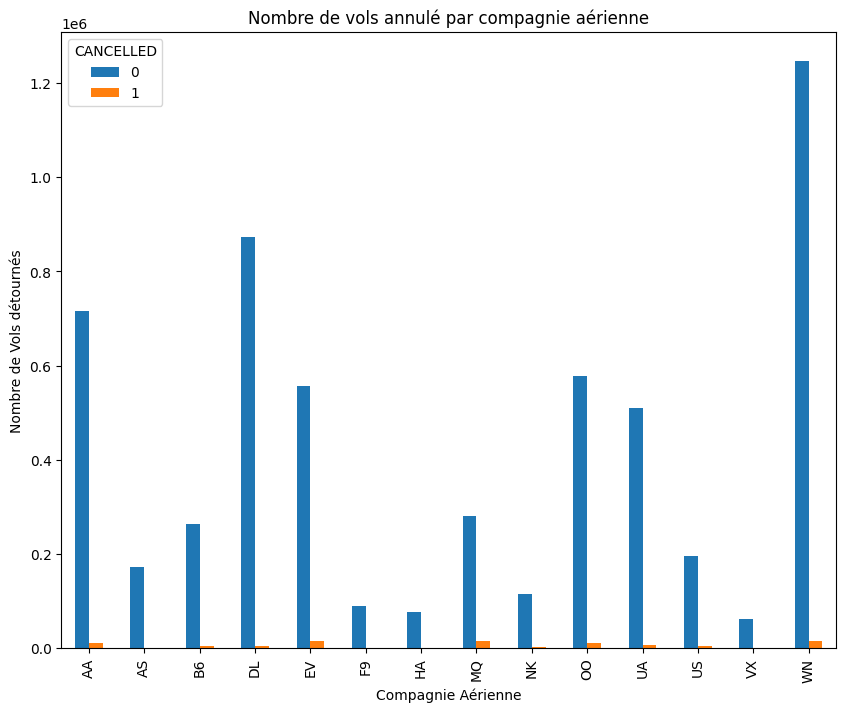

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))  # Ajustez la taille comme nécessaire

# Tracé pour les vols détournés
cancelled_counts.plot(kind='bar', ax=ax)
ax.set_title('Nombre de vols annulé par compagnie aérienne')
ax.set_xlabel('Compagnie Aérienne')
ax.set_ylabel('Nombre de Vols détournés')

# Affiche le graphique
plt.show()
    




In [17]:
df['ORIGIN_AIRPORT'].value_counts().to_frame()

,count
ORIGIN_AIRPORT,
ATL,346836
ORD,285884
DFW,239551
DEN,196055
LAX,194673
...,...
13541,11
10165,9
14222,9


In [18]:
df['DESTINATION_AIRPORT'].value_counts().to_frame()

,count
DESTINATION_AIRPORT,
ATL,346904
ORD,285906
DFW,239582
DEN,196010
LAX,194696
...,...
10165,9
14222,9
13502,7


### Nettoyage des  données 
On peut remarquer  qu'il y' a beaucoup  de valeurs manquantes dans le jeu de données et  pour pallier à ce problème,  on va  supprimer les colonnes dont le nombre de valeurs manquantes est supérieur à 50 % et pour le reste, on va remplacer par la moyenne pour les données numériques et  le mode pour les données catégoriel.

In [19]:
taux_valeurs_manquantes = df.isnull().mean()

In [20]:
seuil = 0.5
sup_col = taux_valeurs_manquantes[taux_valeurs_manquantes > seuil].index

In [21]:
df = df.drop(columns=sup_col, axis=1)


In [22]:
save_col = taux_valeurs_manquantes[taux_valeurs_manquantes < seuil].index

In [23]:
for col in save_col:
    if save[col].dtype in [np.float64, np.int64]:  # Colonnes numériques
        mean_value = save[col].mean()
        save[col].fillna(mean_value, inplace=True)
    elif save[col].dtype == object:  # Colonnes de type objet
        mode_value = save[col].mode()[0]
        save[col].fillna(mode_value, inplace=True)

C:\Users\23769\AppData\Local\Temp\ipykernel_19524\770772732.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  save[col].fillna(mean_value, inplace=True)
C:\Users\23769\AppData\Local\Temp\ipykernel_19524\770772732.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

Nous avons aussi  remarquer  que pour les colones  ORIGIN_AIRPORT et  DESTINATION_AIRPORT   possede des lignes  ou leur valeurs sont des chiffres ce qui  ne correspond a aucun codage d'aeroport  connue . Pour palier a ce probleme , Nous avons decidé de supprimer ces lignes car cette facon d'encoder peut etre cosider comme du bruit

In [24]:
df= df[~df['ORIGIN_AIRPORT'].astype(str).str.isnumeric()]
save= save[~save['ORIGIN_AIRPORT'].astype(str).str.isnumeric()]

In [25]:
df['DESTINATION_AIRPORT'].value_counts().to_frame()

,count
DESTINATION_AIRPORT,
ATL,346904
ORD,285906
DFW,239582
DEN,196010
LAX,194696
...,...
STC,82
DLG,77
GST,77


Pour les colonnes restantes, nous allons remplacer les valeurs manquantes par la moyenne pour les colonnes de type numérique, et  par le mode pour les colonnes de type objet.
Nous avons fait ce choix, car Utiliser la moyenne permet de conserver la tendance centrale et de minimiser l'impact sur la distribution des données numériques.
Le mode quant à lui permet de maintenir la catégorie la plus fréquente, ce qui minimise la perturbation de la distribution des catégories.

In [26]:
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna(df[column].mode()[0])

In [27]:
for column in df.select_dtypes(include=['int','float']):
    df[column] = df[column].fillna(df[column].mean())

In [28]:
data_info(df)

,nombre de valeurs non null,nombre de valeurs null,type,% de valeurs Null,valeurs uniques
YEAR,5332914,0,int64,0.0,1
MONTH,5332914,0,int64,0.0,11
DAY,5332914,0,int64,0.0,31
DAY_OF_WEEK,5332914,0,int64,0.0,7
AIRLINE,5332914,0,object,0.0,14
FLIGHT_NUMBER,5332914,0,int64,0.0,6952
TAIL_NUMBER,5332914,0,object,0.0,4896
ORIGIN_AIRPORT,5332914,0,object,0.0,322
DESTINATION_AIRPORT,5332914,0,object,0.0,322
SCHEDULED_DEPARTURE,5332914,0,int64,0.0,1318


# generation des Prix de vols

les prix des vols peuvent avoir une fluctuation selon la distance parcouru , le jour de la semaine et la compagnie aerienne et plein  d'autre facteurs.
C'est cette fluctuation que nous allons utiliser pour ajuster les prix des vols

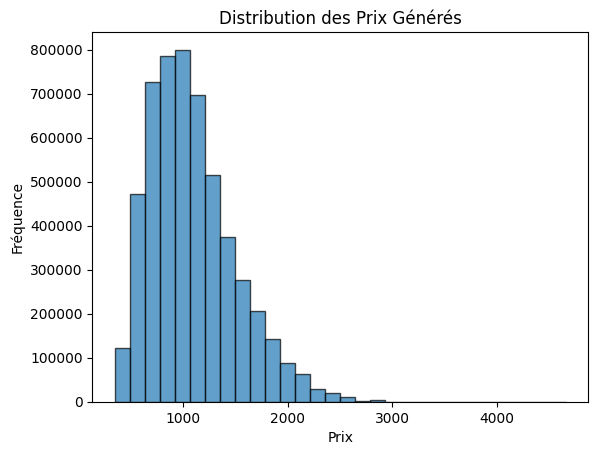

In [29]:

air_adj = {airline: np.random.uniform(0.10, 0.50) for airline in list(df['AIRLINE'].unique())}

airp_adj = {airport: np.random.uniform(0.10, 0.30) for airport in list(df['ORIGIN_AIRPORT'].unique())}


for i in list(df['DESTINATION_AIRPORT'].unique()):
    if i not in airp_adj.keys():
        airp_adj[i] = np.random.uniform(0.10, 0.30)
        
fluctuation = np.random.uniform(0.05, 0.15)

def generate_price(data):

    base_price = 200  # Prix de base par convention
    # Ajustement du prix selon la distance (en miles)
    if data['DISTANCE'] < 1500:
        price = base_price + data['DISTANCE'] * 0.30  
    else:
        price = base_price + data['DISTANCE'] * 0.15 

    # Ajustement du prix selon le jour de la semaine
    if data['DAY_OF_WEEK'] in [5, 7]:  # Vendredi et Dimanche
        price = price +(price * 0.2 )

    # Ajustement du prix selon le mois (vacances)
    if data['MONTH'] in [6, 7, 8, 12]:  # Juin, Juillet, Août, Décembre
        price = price +(price * 0.5) 

    # Ajustements basés sur la compagnie aérienne
    airline = data.get('AIRLINE')
    if airline in air_adj:
        price = price + (price * air_adj[airline])

    # Ajustements basés sur les aéroports d'origine et de destination
    origin_airport = data.get('ORIGIN_AIRPORT')
    if origin_airport in airp_adj:
        price = price + (price * airp_adj[origin_airport])

    destination_airport = data.get('DESTINATION_AIRPORT')
    if destination_airport in airp_adj:
        price= price + (price * airp_adj[destination_airport])

    # Ajustement sur les horaires
    if 600 <= data['SCHEDULED_TIME'] <= 1900:
        price += price * 0.25 

    # Application de la fluctuation aléatoire
    price = price +(price * fluctuation)

    return round(price, 2)



# Génération des prix
df['PRICE'] = df.apply(generate_price, axis=1)


plt.hist(df['PRICE'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.title('Distribution des Prix Générés')
plt.show()

In [30]:
!pip install pandasql
import pandasql as psql

In [31]:

#reconstitution du dataset original avec les prix genérés

save['PRICE'] = df['PRICE']


In [32]:
data_info(save)

,nombre de valeurs non null,nombre de valeurs null,type,% de valeurs Null,valeurs uniques
YEAR,5332914,0,int64,0.000000,1
MONTH,5332914,0,int64,0.000000,11
DAY,5332914,0,int64,0.000000,31
DAY_OF_WEEK,5332914,0,int64,0.000000,7
AIRLINE,5332914,0,object,0.000000,14
FLIGHT_NUMBER,5332914,0,int64,0.000000,6952
TAIL_NUMBER,5332914,0,object,0.000000,4896
ORIGIN_AIRPORT,5332914,0,object,0.000000,322
DESTINATION_AIRPORT,5332914,0,object,0.000000,322
SCHEDULED_DEPARTURE,5332914,0,int64,0.000000,1318


In [33]:
save.to_csv("../Data/EN_data.csv",index=False) # sauvegarde du nouveau dataset enrichi

On peut se rendre que quelques valeurs comme l'année ne varie pas et  le 'TAIL_NUMBER' "FLIGHT_NUMBER"  qui  sont là  pour identifier le voyage DonT  NOUS pouvons nous passer de ces variables

In [34]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'PRICE'],
      dtype='object')

In [35]:
new_df = df.drop(["FLIGHT_NUMBER","TAIL_NUMBER","YEAR"],axis =1)

### Transformations des données 
Nous avons les colones dont le types est "objet"  et  ces variables ne peuvent  oas etre passer a un  modeles dont nous allons transformers ces colones pour les tranformer en  valeur continue .
Pour faire cela nous allons utiliser la fonction get_dummies  qui  vas faire du  one hot enconding  et  nous allons 

In [36]:
new_df= pd.get_dummies(new_df, columns=['AIRLINE'] , dtype=int)

In [37]:
new_df.head()

,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,1,1,4,ANC,SEA,5,2354.0,-11.0,21.0,15.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,4,LAX,PBI,10,2.0,-8.0,12.0,14.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,SFO,CLT,20,18.0,-2.0,16.0,34.0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,4,LAX,MIA,20,15.0,-5.0,15.0,30.0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,4,SEA,ANC,25,24.0,-1.0,11.0,35.0,...,0,0,0,0,0,0,0,0,0,0


Vue que origin_airport  et  destination_airport on enormement du valeur unique, pour l'entrainement du  model ,  nous allons nous passer de ces colones .

In [38]:
X=new_df.drop(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'],axis =1)

In [39]:
X.head()

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,...,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,1,1,4,5,2354.0,-11.0,21.0,15.0,205.0,194.0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,4,10,2.0,-8.0,12.0,14.0,280.0,279.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4,20,18.0,-2.0,16.0,34.0,286.0,293.0,...,0,0,0,0,0,0,0,1,0,0
3,1,1,4,20,15.0,-5.0,15.0,30.0,285.0,281.0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,4,25,24.0,-1.0,11.0,35.0,235.0,215.0,...,0,0,0,0,0,0,0,0,0,0


In [40]:

y = new_df['PRICE']

In [41]:
y


0          1106.31
1          1456.18
2           973.68
3          1350.79
4          1106.31
            ...   
5819074    1897.29
5819075    1502.80
5819076    1352.12
5819077    1478.18
5819078    1342.09
Name: PRICE, Length: 5332914, dtype: float64

In [42]:
X=X.drop(['PRICE'],axis =1)

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332914 entries, 0 to 5819078
Data columns (total 33 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   SCHEDULED_DEPARTURE  int64  
 4   DEPARTURE_TIME       float64
 5   DEPARTURE_DELAY      float64
 6   TAXI_OUT             float64
 7   WHEELS_OFF           float64
 8   SCHEDULED_TIME       float64
 9   ELAPSED_TIME         float64
 10  AIR_TIME             float64
 11  DISTANCE             int64  
 12  WHEELS_ON            float64
 13  TAXI_IN              float64
 14  SCHEDULED_ARRIVAL    int64  
 15  ARRIVAL_TIME         float64
 16  ARRIVAL_DELAY        float64
 17  DIVERTED             int64  
 18  CANCELLED            int64  
 19  AIRLINE_AA           int32  
 20  AIRLINE_AS           int32  
 21  AIRLINE_B6           int32  
 22  AIRLINE_DL           int32  
 23  AIRLINE_EV           int32  
 24  AIR

SEPEARATION  DU  JEU  DE DONNEES EN  jeu d'entrainment et  jeu de test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

In [45]:
"""rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("R-squared (R²): ", r2)"""

'rf = RandomForestRegressor()\nrf.fit(X_train, y_train)\ny_pred = rf.predict(X_test)\nmse = metrics.mean_squared_error(y_test, y_pred)\nrmse = np.sqrt(mse)\nr2 = metrics.r2_score(y_test, y_pred)\nprint("Mean Squared Error (MSE): ", mse)\nprint("Root Mean Squared Error (RMSE): ", rmse)\nprint("R-squared (R²): ", r2)'

In [46]:

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = metrics.r2_score(y_test, y_pred_lr)
print("Mean Squared Error (MSE): ", mse_lr)
print("Root Mean Squared Error (RMSE): ", rmse_lr)
print("R-squared (R²): ", r2_lr)

Mean Squared Error (MSE):  75310.18156105882
Root Mean Squared Error (RMSE):  274.4270058887405
R-squared (R²):  0.5496550264127074


In [47]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = metrics.mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = metrics.r2_score(y_test, y_pred_dt)
print("Mean Squared Error (MSE): ", mse_dt)
print("Root Mean Squared Error (RMSE): ", rmse_dt)
print("R-squared (R²): ", r2_dt)

Mean Squared Error (MSE):  232.4784147295616
Root Mean Squared Error (RMSE):  15.247242856646627
R-squared (R²):  0.9986098096781759


In [48]:
from xgboost import XGBRegressor


xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)
mse_xgbr = metrics.mean_squared_error(y_test, y_pred_xgbr)
rmse_xgbr = np.sqrt(mse_xgbr)
r2_xgbr = metrics.r2_score(y_test, y_pred_xgbr)
print("Mean Squared Error (MSE): ", mse_xgbr)
print("Root Mean Squared Error (RMSE): ", rmse_xgbr)
print("R-squared (R²): ", r2_xgbr)

Mean Squared Error (MSE):  3389.046483158116
Root Mean Squared Error (RMSE):  58.21551754608144
R-squared (R²):  0.9797339480889907
